# 本节目录

#### 1、三种常见的数据类型
#### 2、函数（Function）与函数库（Packages）
#### 3、数据集的输入
#### 4、整理数据
#### 5、如何处理数据中的缺失值
#### 6、R语言建立结构方程模型的整体流程

#### 课件及代码请见  Github： https://github.com/MoonDataAnalysis/R_SEM

# 1、三种常见数据类型

#### 什么是向量？


In [ ]:
#数值型向量
c(1, 2, 3)
#字符型向量
c("e","e","e","曲项向天歌")
# 逻辑运算符构成向量
c(TRUE,TRUE,FALSE)
# 混杂?
c(1, "e", TRUE)

#### 什么是矩阵？


In [ ]:
matrix(c(1:15), nrow=3, ncol=5, byrow = T)

#### 什么是数据集？

In [ ]:
data.frame(values=c(1, 2, 3),
          char=c("e","e","曲项向天歌"),
          logic=c(TRUE,TRUE,FALSE))

# 2、函数（Function）与函数库（Packages）

R 语言中有很多基础函数（指令）

例如： 

求均值使用 mean()

求标准差使用 sd()

求和使用 sum()

......

这些函数使用的方式都是一样的，见下图

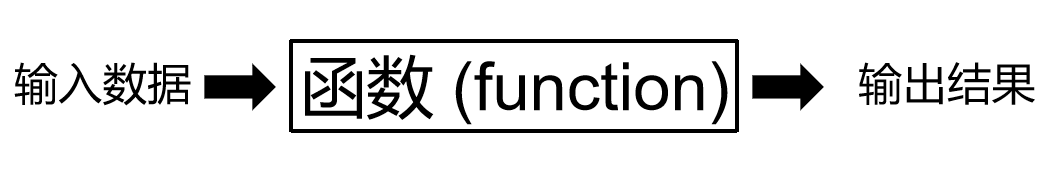

In [ ]:
# 举例
c(2,4,5)
mean(c(2,4,5))

In [ ]:
# 数据赋予变量名
a <- c(2,4,5)
b <- mean(a)

a
b

#### 每一个函数对输入数据的格式都是有要求的



In [ ]:
# 查看帮助文档，了解该函数输入什么数据，输出什么数据（结果）
help(mean)

#### 有些函数是 R 自带的，有些函数需要载入新的函数库

我们即将用来建模结构方程模型的函数库是 lavaan

In [ ]:
# 下载 lavaan
install.packages("lavaan")

In [ ]:
# 载入 lavaan
library("lavaan")

#### 就可以使用 lavaan 中的所有函数了
如何快速了解 lavaan 中有哪些函数？

In [ ]:
# 输入 "lavaan::" 按住 tab 键
lavaan::

# 3、数据集的输入

如何从外部导入数据集？

In [ ]:
# 如果数据是.csv文件, 注意！路径一定是“/”而不是“\”
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_seris_med.csv")

head(BASE)

In [ ]:
# 如果数据是.xlsx 或者 .xls 等 excel格式
library("readxl")
BASE <- read_excel("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_ob_mod.xlsx")
head(BASE)

#### 其他文件类型：

library(foreign)

读取SAS文件 rx <- read.xport("文件路径及名称.xpt") 

读取S-PLUS文件 rs <- read.S("文件路径及名称") 

读取Stata文件 rd <- read.dta("文件路径及名称.dta")

# 4、整理数据

对于刚接触 R 语言的同学，建议直接使用 excel 整理数据。

需要把数据整理成以下格式：

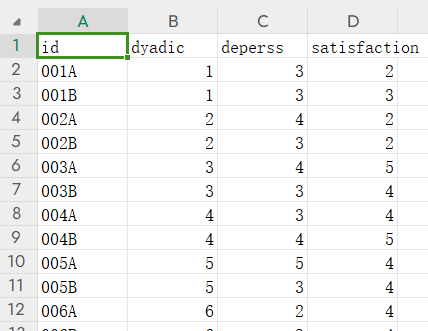

每一行是一个被试（即使是配对数据、追踪数据，最小单位“行”也应为被试）

每一列是这个被试的变量，例如这个被试属于哪一对对子（夫妻），这个被试的各项指标测量结果（deperss、satisfaction）....



# 5、如何处理数据中的缺失值？

所有的缺失值全部转化为 NaN

在 lavaan 建模过程中设置 全信息极大似然估计（ full information likelihood ，FIML ）填充缺失值。

例如：

sem(model, data = BASE, missing = 'fiml')

sem(model, data = BASE, missing = 'fiml.x')

# 6、R语言建模的整体流程？

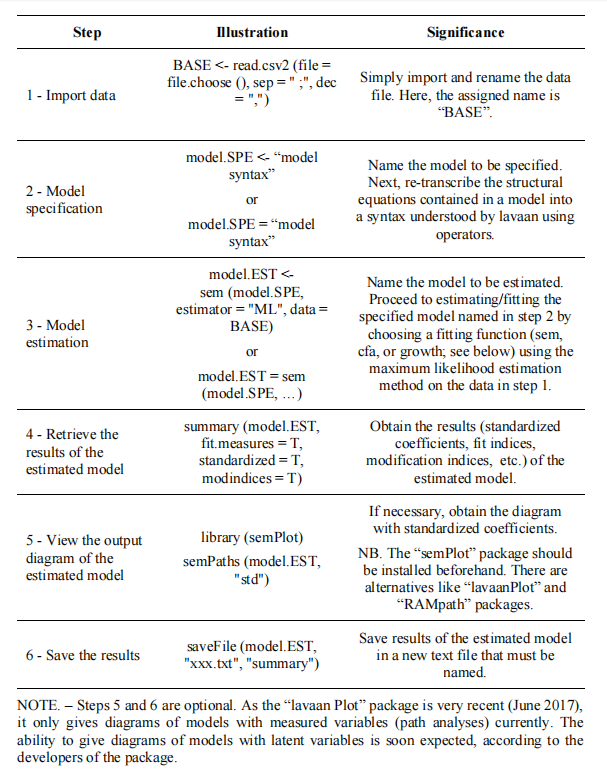

In [ ]:
# 导入数据
BASE <- readxl::read_excel("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_ob_mod.xlsx")
head(BASE)

In [ ]:
# 载入 lavaan 函数库
library(lavaan)

## lavaan 建模的基本运算符

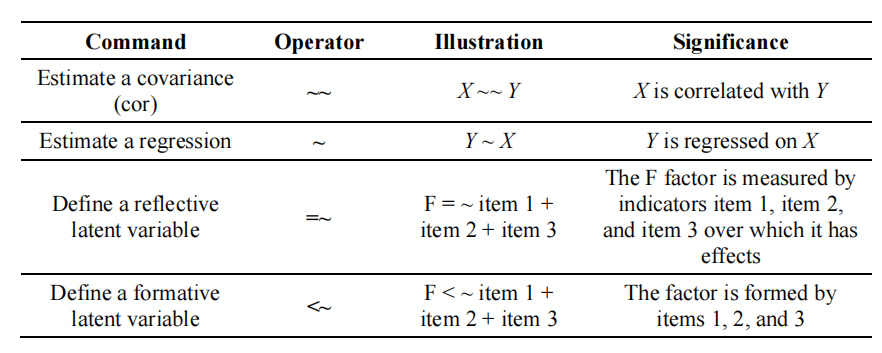

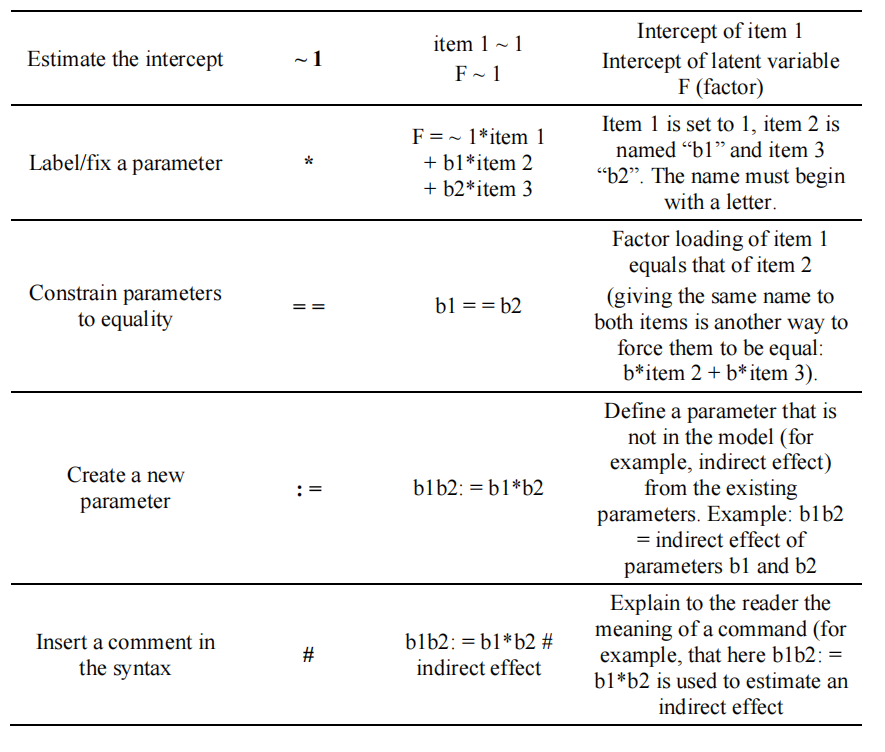

In [ ]:
# 定义模型
MOD <- "
  y ~ x + z + w + u
"

In [ ]:
# 拟合模型
MOD_fit <- sem(model = MOD,, missing = 'fiml.x',data=BASE)

In [ ]:
# 提取统计结果
MOD_summ <- summary(MOD_fit)

In [ ]:
# 提取统计表
MOD_summ$pe

In [ ]:
# 输出表格，手动整理三线表
write.csv(MOD_summ$pe,
         file="C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/table.csv")

## 以上学习可以帮助您基本使用R，想要真正学会R，建议看一下UP主的《R语言与建模》1-18课。

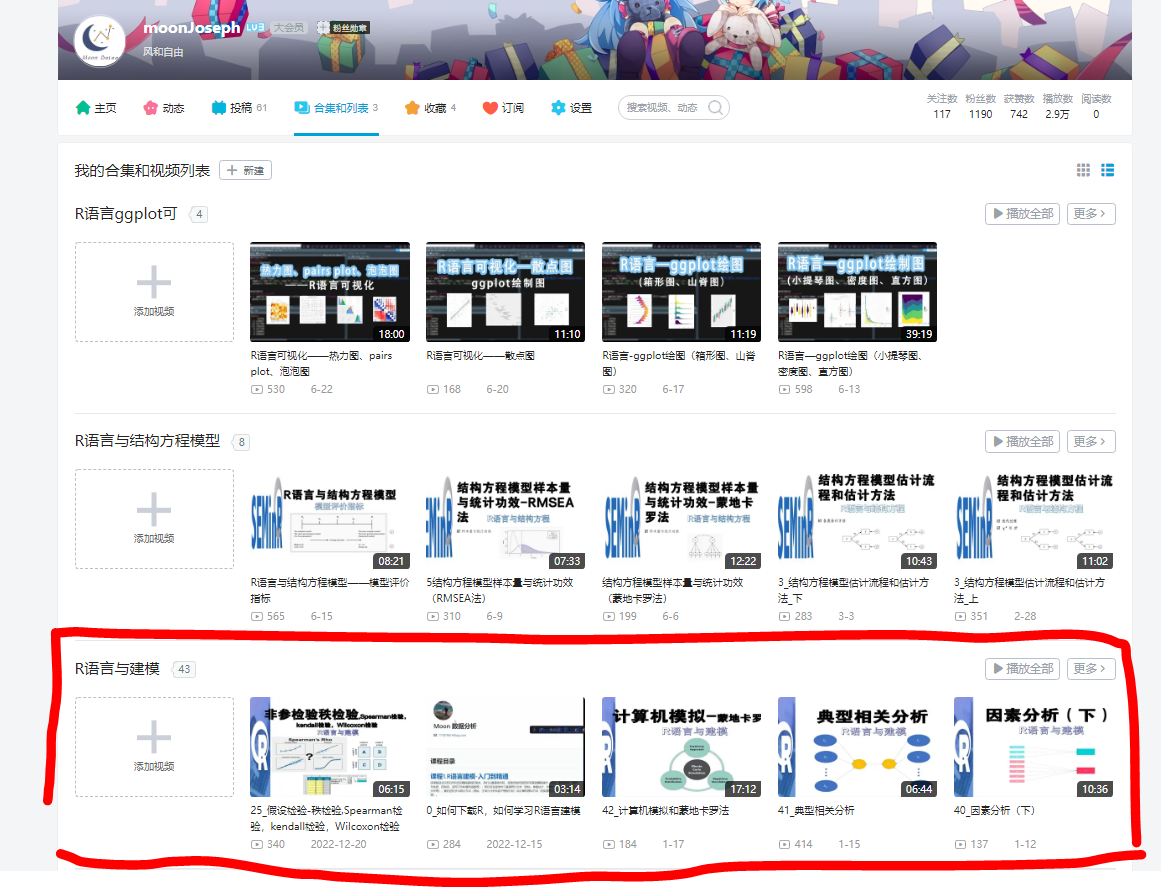